In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math as math
import pandas as pd

In [80]:
# Our SEIAVRD Model

j = 1 # Choose subpopulation 1-5
t_max = 150 #Choose time interval

In [81]:
t = np.linspace(0,t_max,5000)
t_data = np.linspace(0,t_max,t_max+1)

In [82]:
i_datalist = np.zeros(5)
d_datalist = np.zeros(5)
N_list = np.zeros(5)
r_votes_list = np.zeros(5)

N_list[0] = 29086766 #a1 initial population
N_list[1] = 131505862 #a2 initial population
N_list[2] = 62118607 #a3 initial population
N_list[3] = 83475174 #a4 initial population
N_list[4] = 19371663 #a5 initial population

# 0 cumulative cases by population
i_datalist[0] = 1.65e6
i_datalist[1] = 1.12e7
i_datalist[2] = 5.55e6
i_datalist[3] = 0.74e7
i_datalist[4] = 1.85e6

# 0 cumulative deaths by population
d_datalist[0] = 32300
d_datalist[1] = 195000
d_datalist[2] = 90000
d_datalist[3] = 127500
d_datalist[4] = 35500

r_votes_list[0] = .2 # % of 2020 trump votes
r_votes_list[1] = .4
r_votes_list[2] = .5
r_votes_list[3] = .7
r_votes_list[4] = .9

r_votes = r_votes_list[j-1]
# r_votes = .35 # or hard code specific value

i_data = i_datalist[j-1] # 0 cumulative cases in population of interest
d_data = d_datalist[j-1] # 0 cumulative deaths in population of interest

rho = .001 # scaling factor for transmission rate estimation



# parameter values
t_incubation = 2.8 #time from exposed to to infected
v_incubation = 10.17 #time from vaccinated to vaccine activation, weighted average of pfizer, moderna, johnson&johnson
r_time = 9 #average covid recovery time

prop = (.553*N_list[0]+.531*N_list[1]+.490*N_list[2]+.422*N_list[3]+.347*N_list[4])/(N_list[0]+N_list[1]+N_list[2]+N_list[3]+N_list[4])

alpha = .92 # vaccine efficacy against infection, weighted average of pfizer, moderna, johnson&johnson
beta = 1/t_incubation # rate of emigration from exposed
mu_c = .00189 # death rate from infection without effective vaccination
mu = 715.2/100000 # natural death rate
nu = 0.0024988264652203583/prop # vaccination rate
lambdaa = 1/r_time # rate of asymptomatic to recovered
lambdai = 1/r_time # rate of infected to recovered
phi = 1/v_incubation # rate of vaccine activation
sigma = .35 # ratio of asymptomatic cases to all cases


N_list[0] = 29086766 #a1 initial population
N_list[1] = 131505862 #a2 initial population
N_list[2] = 62118607 #a3 initial population
N_list[3] = 83475174 #a4 initial population
N_list[4] = 19371663 #a5 initial population

N1=N_list[0]
N2=N_list[1]
N3=N_list[2]
N4=N_list[3]
N5=N_list[4]

N1_avg = N1/62
N2_avg = N2/355
N3_avg = N3/330
N4_avg = N4/1385
N5_avg = N5/983

N_tot = np.sum(N_list)

N = N_list[j-1] #population of interest

In [83]:
# Start with randomly generated mobility matrix

 # K = [[.924306, .037859, .019997, .011338, .006500],[.183433, .511133, .119763, .113481, .072190],[.041456, .060934, .773271, .074578, .049761],[.032418, .093286, .131840, .517380, .225077],[.002707, .011774, .021985, .082640, .880895]]

# Rows are origins, columns are destinations

N_mat = [[N_list[0], N_list[1], N_list[2], N_list[3], N_list[4]]]



In [84]:

prop = (.553*N_list[0]+.531*N_list[1]+.490*N_list[2]+.422*N_list[3]+.347*N_list[4])/(N_list[0]+N_list[1]+N_list[2]+N_list[3]+N_list[4])



In [85]:
epsilon = 5

In [86]:
b1 = 0.553
b2 = 0.531
b3 = 0.490
b4 = 0.422
b5 = 0.347

gammai1 = 0.11696696696696697/N1*epsilon # rate of susceptibles exposed by infected
gammaa1 = .8*gammai1 # rate of susceptibles exposed by asymptomatic
theta1 = 11/1000*N_list[0] # natural birth rate
i01 = 17378.33
a01 = i01*sigma/(1-sigma)
e01 = (a01+i01)*t_incubation
v01 = .1*N_list[0]
r01 = 0
d01 = d_datalist[0] #cumulative total dead
c01 = i_datalist[0] #cumulative total symptomatic to fit to data
s01 = N1 - e01 - i01 - v01 - r01

gammai2 = 0.11906906906906907/N2*epsilon # rate of susceptibles exposed by infected
gammaa2 = .8*gammai2 # rate of susceptibles exposed by asymptomatic
theta2 = 11/1000*N_list[1] # natural birth rate
i02 = 125584.78
a02 = i02*sigma/(1-sigma)
e02 = (a02+i02)*t_incubation
v02 = .1*N_list[1]
r02 = 0
d02 = d_datalist[1] #cumulative total dead
c02 = i_datalist[1] #cumulative total symptomatic to fit to data
s02 = N2 - e02 - i02 - v02 - r02

gammai3 = 0.11486486486486487/N3*epsilon # rate of susceptibles exposed by infected
gammaa3 = .8*gammai3 # rate of susceptibles exposed by asymptomatic
theta3 = 11/1000*N_list[2] # natural birth rate
i03 = 63091.78
a03 = i03*sigma/(1-sigma)
e03 = (a03+i03)*t_incubation
v03 = .1*N_list[2]
r03 = 0
d03 = d_datalist[2] #cumulative total dead
c03 = i_datalist[2] #cumulative total symptomatic to fit to data
s03 = N3 - e03 - i03 - v03 - r03

gammai4 = 0.11906906906906907/N4*epsilon # rate of susceptibles exposed by infected
gammaa4 = .8*gammai4 # rate of susceptibles exposed by asymptomatic
theta4 = 11/1000*N_list[3] # natural birth rate
i04 = 84349.83
a04 = i04*sigma/(1-sigma)
e04 = (a04+i04)*t_incubation
v04 = .1*N_list[3]
r04 = 0
d04 = d_datalist[3] #cumulative total dead
c04 = i_datalist[3] #cumulative total symptomatic to fit to data
s04 = N4 - e04 - i04 - v04 - r04

gammai5 = 0.12072072072072072/N5*epsilon # rate of susceptibles exposed by infected
gammaa5 = .8*gammai5 # rate of susceptibles exposed by asymptomatic
theta5 = 11/1000*N_list[4] # natural birth rate
i05 = 20656.42
a05 = i05*sigma/(1-sigma)
e05 = (a05+i05)*t_incubation
v05 = .1*N_list[4]
r05 = 0
d05 = d_datalist[4] #cumulative total dead
c05 = i_datalist[4] #cumulative total symptomatic to fit to data
s05 = N5 - e05 - i05 - v05 - r05

P = [0.5053947364,0.2917594892,0.09564082366,0.09234463935,0.01486031142,0.07337645699,0.634262933,0.1240756426,0.1443336085,0.02395135895,0.04574063405,0.253203992,0.5127492887,0.1611845012,0.02712158409,0.0383875258,0.2659332905, 0.1517482564, 0.4948974644, 0.04903346298,0.0253169974,0.1949591985,0.1244062188,0.3037604136,0.3515571716]

for i in range (len(P)):
  P[i] = P[i]*1



P[0] = 1 - P[4] - P[3] - P[2] - P[1]
P[6] = 1 - P[9] - P[8] - P[7] - P[5]
P[12] = 1 - P[14] - P[13] - P[11] - P[10]
P[17] = 1 - P[19] - P[17] - P[16] - P[15]
P[24] = 1 - P[20] - P[23] - P[22] - P[21]



In [87]:
# Our SEIAVR model

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt


# Define your model function
def modelcd(x, t, P):
    s1, e1, i1, a1, v1, r1, d1, c1, s2, e2, i2, a2, v2, r2, d2, c2, s3, e3, i3, a3, v3, r3, d3, c3, s4, e4, i4, a4, v4, r4, d4, c4, s5, e5, i5, a5, v5, r5, d5, c5 = x

    deltai1 = gammai1*P[0]*(P[0]*i1+P[5]*i2+P[10]*i3+P[15]*i4+P[20]*i5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammai2*P[1]*(P[1]*i1+P[6]*i2+P[11]*i3+P[16]*i4+P[21]*i5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammai3*P[2]*(P[2]*i1+P[7]*i2+P[12]*i3+P[17]*i4+P[22]*i5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammai4*P[3]*(P[3]*i1+P[8]*i2+P[13]*i3+P[18]*i4+P[23]*i5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammai5*P[4]*(P[4]*i1+P[9]*i2+P[14]*i3+P[19]*i4+P[24]*i5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltaa1 = gammaa1*P[0]*(P[0]*a1+P[5]*a2+P[10]*a3+P[15]*a4+P[20]*a5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammaa2*P[1]*(P[1]*a1+P[6]*a2+P[11]*a3+P[16]*a4+P[21]*a5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammaa3*P[2]*(P[2]*a1+P[7]*a2+P[12]*a3+P[17]*a4+P[22]*a5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammaa4*P[3]*(P[3]*a1+P[8]*a2+P[13]*a3+P[17]*a4+P[23]*a5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammaa5*P[4]*(P[4]*a1+P[9]*a2+P[14]*a3+P[19]*a4+P[24]*a5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltai2 = gammai2*P[5]*(P[0]*i1+P[5]*i2+P[10]*i3+P[15]*i4+P[20]*i5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammai2*P[6]*(P[1]*i1+P[6]*i2+P[11]*i3+P[16]*i4+P[21]*i5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammai3*P[7]*(P[2]*i1+P[7]*i2+P[12]*i3+P[17]*i4+P[22]*i5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammai4*P[8]*(P[3]*i1+P[8]*i2+P[13]*i3+P[18]*i4+P[23]*i5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammai5*P[9]*(P[4]*i1+P[9]*i2+P[14]*i3+P[19]*i4+P[24]*i5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltaa2 = gammaa2*P[5]*(P[0]*a1+P[5]*a2+P[10]*a3+P[15]*a4+P[20]*a5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammaa2*P[6]*(P[1]*a1+P[6]*a2+P[11]*a3+P[16]*a4+P[21]*a5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammaa3*P[7]*(P[2]*a1+P[7]*a2+P[12]*a3+P[17]*a4+P[22]*a5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammaa4*P[8]*(P[3]*a1+P[8]*a2+P[13]*a3+P[17]*a4+P[23]*a5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammaa5*P[9]*(P[4]*a1+P[9]*a2+P[14]*a3+P[19]*a4+P[24]*a5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltai3 = gammai3*P[10]*(P[0]*i1+P[5]*i2+P[10]*i3+P[15]*i4+P[20]*i5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammai2*P[11]*(P[1]*i1+P[6]*i2+P[11]*i3+P[16]*i4+P[21]*i5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammai3*P[12]*(P[2]*i1+P[7]*i2+P[12]*i3+P[17]*i4+P[22]*i5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammai4*P[13]*(P[3]*i1+P[8]*i2+P[13]*i3+P[18]*i4+P[23]*i5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammai5*P[14]*(P[4]*i1+P[9]*i2+P[14]*i3+P[19]*i4+P[24]*i5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltaa3 = gammaa3*P[10]*(P[0]*a1+P[5]*a2+P[10]*a3+P[15]*a4+P[20]*a5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammaa2*P[11]*(P[1]*a1+P[6]*a2+P[11]*a3+P[16]*a4+P[21]*a5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammaa3*P[12]*(P[2]*a1+P[7]*a2+P[12]*a3+P[17]*a4+P[22]*a5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammaa4*P[13]*(P[3]*a1+P[8]*a2+P[13]*a3+P[17]*a4+P[23]*a5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammaa5*P[14]*(P[4]*a1+P[9]*a2+P[14]*a3+P[19]*a4+P[24]*a5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltai4 = gammai4*P[15]*(P[0]*i1+P[5]*i2+P[10]*i3+P[15]*i4+P[20]*i5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammai2*P[16]*(P[1]*i1+P[6]*i2+P[11]*i3+P[16]*i4+P[21]*i5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammai3*P[17]*(P[2]*i1+P[7]*i2+P[12]*i3+P[17]*i4+P[22]*i5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammai4*P[18]*(P[3]*i1+P[8]*i2+P[13]*i3+P[18]*i4+P[23]*i5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammai5*P[19]*(P[4]*i1+P[9]*i2+P[14]*i3+P[19]*i4+P[24]*i5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltaa4 = gammaa4*P[15]*(P[0]*a1+P[5]*a2+P[10]*a3+P[15]*a4+P[20]*a5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammaa2*P[16]*(P[1]*a1+P[6]*a2+P[11]*a3+P[16]*a4+P[21]*a5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammaa3*P[17]*(P[2]*a1+P[7]*a2+P[12]*a3+P[17]*a4+P[22]*a5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammaa4*P[18]*(P[3]*a1+P[8]*a2+P[13]*a3+P[18]*a4+P[23]*a5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[18]*N4+P[23]*N5)+gammaa5*P[19]*(P[4]*a1+P[9]*a2+P[14]*a3+P[19]*a4+P[24]*a5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltai5 = gammai5*P[20]*(P[0]*i1+P[5]*i2+P[10]*i3+P[15]*i4+P[20]*i5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammai2*P[21]*(P[1]*i1+P[6]*i2+P[11]*i3+P[16]*i4+P[21]*i5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammai3*P[22]*(P[2]*i1+P[7]*i2+P[12]*i3+P[17]*i4+P[22]*i5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammai4*P[23]*(P[3]*i1+P[8]*i2+P[13]*i3+P[18]*i4+P[23]*i5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammai5*P[24]*(P[4]*i1+P[9]*i2+P[14]*i3+P[19]*i4+P[24]*i5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)

    deltaa5 = gammaa5*P[20]*(P[0]*a1+P[5]*a2+P[10]*a3+P[15]*a4+P[20]*a5)/(P[0]*N1+P[5]*N2+P[10]*N3+P[15]*N4+P[20]*N5)+gammaa2*P[21]*(P[1]*a1+P[6]*a2+P[11]*a3+P[16]*a4+P[21]*a5)/(P[1]*N1+P[6]*N2+P[11]*N3+P[16]*N4+P[21]*N5)+gammaa3*P[22]*(P[2]*a1+P[7]*a2+P[12]*a3+P[17]*a4+P[22]*a5)/(P[2]*N1+P[7]*N2+P[12]*N3+P[17]*N4+P[22]*N5)+gammaa4*P[23]*(P[3]*a1+P[8]*a2+P[13]*a3+P[17]*a4+P[23]*a5)/(P[3]*N1+P[8]*N2+P[13]*N3+P[17]*N4+P[23]*N5)+gammaa5*P[24]*(P[4]*a1+P[9]*a2+P[14]*a3+P[19]*a4+P[24]*a5)/(P[4]*N1+P[9]*N2+P[14]*N3+P[19]*N4+P[24]*N5)


    ds1dt = theta1 - deltai1* s1 - nu * b1 * s1 - deltaa1 * s1 - mu * s1
    de1dt = deltai1 * s1 + deltaa1 * s1 - beta * e1 + deltai1 * (1-alpha) * v1 + deltaa1 * (1-alpha) * v1 - mu * e1
    di1dt = (1 - sigma) * beta * e1 - mu_c * a1 - lambdaa * a1 - mu * a1
    da1dt = sigma * beta * e1 - lambdaa * a1 - mu * a1
    dv1dt = nu * b1 * s1 - phi * v1 - deltai1 * (1-alpha) * v1 - deltaa1 * (1-alpha) * v1 - mu * v1
    dr1dt = lambdaa * a1 + lambdai * i1 + phi * v1 - mu * r1
    dd1dt = mu_c * i1
    dc1dt = (1 - sigma) * beta * e1

    ds2dt = theta2 - deltai2 * s2 - nu * b2 * s2 - deltaa2 * s2 - mu * s2
    de2dt = deltai2 * s2 + deltaa2 * s2- beta * e2 + deltai2 * (1-alpha) * v2 + deltaa2 * (1-alpha) * v2 - mu * e2
    di2dt = (1 - sigma) * beta * e2 - mu_c * i2 - lambdai * i2 - mu * i2
    da2dt = sigma * beta * e2 - lambdaa * a2 - mu * a2
    dv2dt = nu * b2 * s2 - phi * v2 - deltai2 * (1-alpha) * v2 - deltaa2 * (1-alpha) * v2 - mu * v2
    dr2dt = lambdaa * a2 + lambdai * i2 + phi * v2 - mu * r2
    dd2dt = mu_c * i2
    dc2dt = (1 - sigma) * beta * e2

    ds3dt = theta3 - deltai3 * s3 - nu * b3 * s3 - deltaa3 * s3 - mu * s3
    de3dt = deltai3 * s3 + deltaa3 * s3 - beta * e3 + deltai3 * (1-alpha) * v3 + deltaa3 * (1-alpha) * v3 - mu * e3
    di3dt = (1 - sigma) * beta * e3 - mu_c * i3 - lambdai * i3 - mu * i3
    da3dt = sigma * beta * e3 - lambdaa * a3 - mu * a3
    dv3dt = nu * b3 * s3 - phi * v3 - deltai3 * (1-alpha) * v3 - deltaa3 * (1-alpha) * v3 - mu * v3
    dr3dt = lambdaa * a3 + lambdai * i3 + phi * v3 - mu * r3
    dd3dt = mu_c * i3
    dc3dt = (1 - sigma) * beta * e3

    ds4dt = theta4 - deltai4 * s4 - nu * b4 * s4 - deltaa4 * s4 - mu * s4
    de4dt = deltai4 * s4 + deltaa4 * s4 - beta * e4 + deltai4 * (1-alpha) * v4 + deltaa4 * (1-alpha) * v4 - mu * e4
    di4dt = (1 - sigma) * beta * e4 - mu_c * i4 - lambdai * i4 - mu * i4
    da4dt = sigma * beta * e4 - lambdaa * a4 - mu * a4
    dv4dt = nu * b4 * s4 - phi * v4 - deltai4 * (1-alpha) * v4 - deltaa4 * (1-alpha) * v4 - mu * v4
    dr4dt = lambdaa * a4 + lambdai * i4 + phi * v4 - mu * r4
    dd4dt = mu_c * i4
    dc4dt = (1 - sigma) * beta * e4

    ds5dt = theta5 - deltai5 * s5 - nu * b5 * s5 - deltaa5 * s5 - mu * s5
    de5dt = deltai5 * s5 + deltaa5 * s5 - beta * e5 + deltai5 * (1-alpha) * v5 * i5 + deltaa5 * (1-alpha) * v5 * a5 - mu * e5
    di5dt = (1 - sigma) * beta * e5 - mu_c * i5 - lambdai * i5 - mu * i5
    da5dt = sigma * beta * e5 - lambdaa * a5 - mu * a5
    dv5dt = nu * b5 * s5 - phi * v5 - deltai5 * (1-alpha) * v5 - deltaa5 * (1-alpha) * v5 - mu * v5
    dr5dt = lambdaa * a5 + lambdai * i5 + phi * v5 - mu * r5
    dd5dt = mu_c * i5
    dc5dt = (1 - sigma) * beta * e5

    return [ds1dt, de1dt, di1dt, da1dt, dv1dt, dr1dt, dd1dt, dc1dt,
            ds2dt, de2dt, di2dt, da2dt, dv2dt, dr2dt, dd2dt, dc2dt,
            ds3dt, de3dt, di3dt, da3dt, dv3dt, dr3dt, dd3dt, dc3dt,
            ds4dt, de4dt, di4dt, da4dt, dv4dt, dr4dt, dd4dt, dc4dt,
            ds5dt, de5dt, di5dt, da5dt, dv5dt, dr5dt, dd5dt, dc5dt]



# Define parameters with example values
x0 = s01, e01, i01, a01, v01, r01, d01, c01, s02, e02, i02, a02, v02, r02, d02, c02, s03, e03, i03, a03, v03, r03, d03, c03, s04, e04, i04, a04, v04, r04, d04, c04, s05, e05, i05, a05, v05, r05, d05, c05
parameters = [P, b1, b2, b3, b4, b5, beta, gammaa1, gammai1, gammaa2, gammai2, gammaa3, gammai3, gammaa4, gammai4, gammaa5, gammai5,
              lambdaa, lambdai, mu, mu_c, nu, phi, sigma, theta1, theta2, theta3, theta4, theta5]

# Call odeint with parameters
soln = odeint(modelcd, x0, t, args=(P,))
#s, e, i, a, v, r, d, c = soln.T
s1, e1, i1, a1, v1, r1, d1, c1, s2, e2, i2, a2, v2, r2, d2, c2, s3, e3, i3, a3, v3, r3, d3, c3, s4, e4, i4, a4, v4, r4, d4, c4, s5, e5, i5, a5, v5, r5, d5, c5 = soln.T


Results for A5


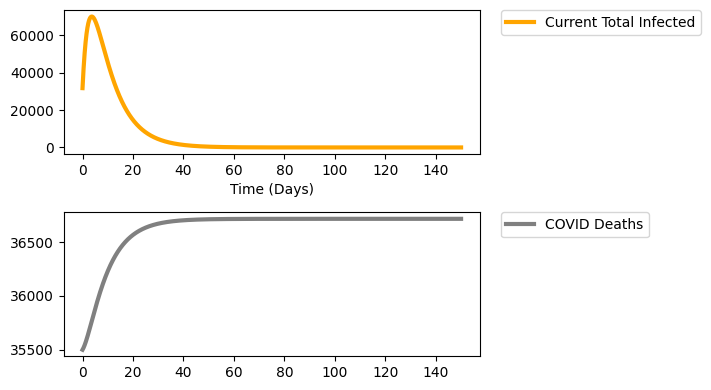

In [88]:


def plotdata(t, s, e, i, a, v, r, d, c):
    # plot the data
    fig, ax=plt.subplots(2,1,figsize=(5,4))

    ax[0].plot(t, i+a, lw=3, label='Current Total Infected', color = 'orange')
    ax[1].plot(t, d, lw=3, label='COVID Deaths', color = 'gray')

    ax[0].set_xlabel('Time (Days)');
    ax[0].set_xlabel('Time (Days)');

    plt.tight_layout()
    ax[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Plot the results FIX THIS PART, also make sure that the figures actually look right lol
print('Results for A5')
plotdata(t, s5, e5, i5, a5, v5, r5, d5, c5);

Results for A2


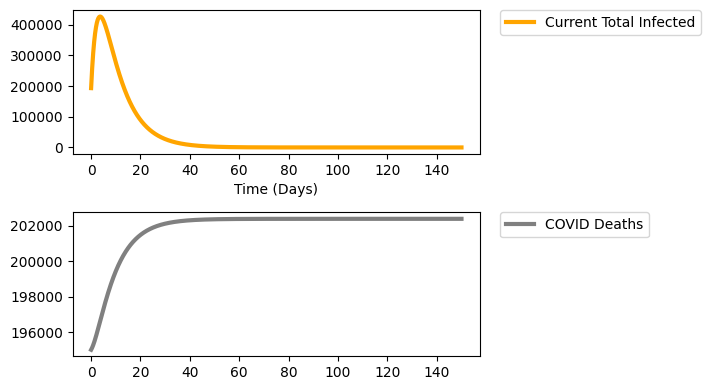

In [89]:
print('Results for A2')
plotdata(t, s2, e2, i2, a2, v2, r2, d2, c2);

Results for A3


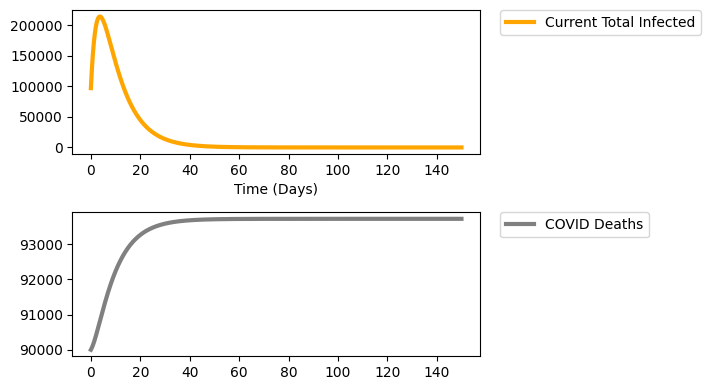

In [90]:
print('Results for A3')
plotdata(t, s3, e3, i3, a3, v3, r3, d3, c3);

Results for A4


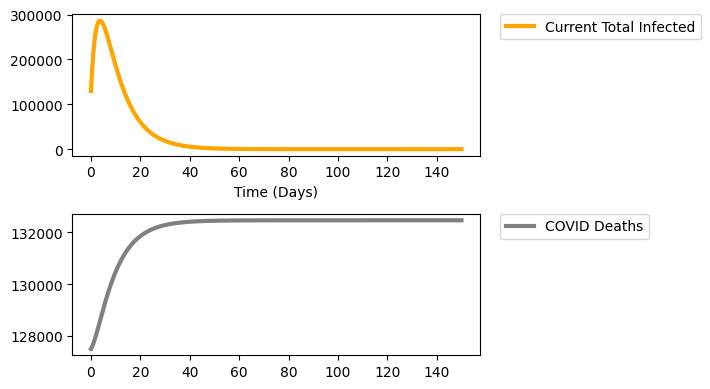

In [91]:
print('Results for A4')
plotdata(t, s4, e4, i4, a4, v4, r4, d4, c4);

Results for A5


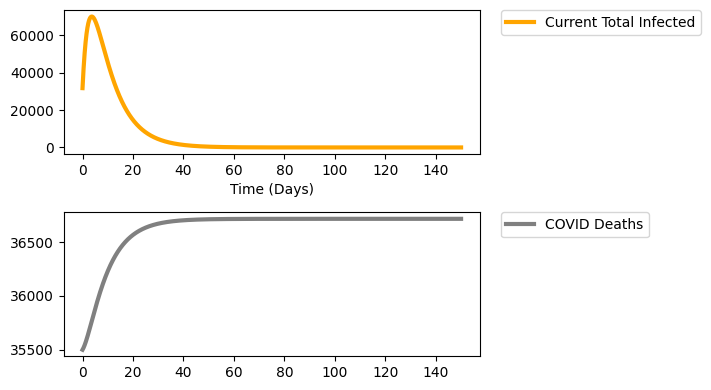

In [92]:
print('Results for A5')
plotdata(t, s5, e5, i5, a5, v5, r5, d5, c5);

In [93]:
#Parameter Estimation
import pandas as pd

import scipy.optimize as optimize
from scipy.optimize import least_squares
from scipy.stats import poisson
from scipy.stats import norm

In [94]:
qdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/us-counties-2021.csv')
qdf['county'] = qdf['county'].str.lower()
qdf['state'] = qdf['state'].str.lower()
qdf['county_state'] = qdf['county'] + '-' + qdf['state']
print("Total counties including Alaska and Hawaii after concatenating state & county US counites:", len(qdf['county_state'].unique()))
qdf['date'] = pd.to_datetime(qdf['date'], errors='coerce')

qdf = qdf.dropna(subset=['date'])

start_date = '2021-03-01'
end_date = '2021-09-01'

date_filtered_data = qdf[(qdf['date'] >= start_date) & (qdf['date'] <= end_date)]

vdf = pd.read_csv('/content/drive/Shareddrives/QRLSSP 2024/COVID/Python Code/2020 Election Voting by County csv.csv')
vdf = vdf[~vdf['state'].isin(['alaska', 'hawaii'])]
vdf['name'] = vdf['name'].str.lower()
vdf['state'] = vdf['state'].str.lower()
vdf['name_state'] = vdf['name'] + '-' + vdf['state']
vdf['trumpd_votes_ratio'] = vdf['results_trumpd'] / vdf['votes']
print("Total counties including Alaska and Hawaii after concatenating state & county Voting:", len(vdf['name_state'].unique()))

Total counties including Alaska and Hawaii after concatenating state & county US counites: 3262
Total counties including Alaska and Hawaii after concatenating state & county Voting: 3115


In [95]:
# Categorize counties into a1 to a5 based on Trump vote ratios
a1, a2, a3, a4, a5 = [], [], [], [], []

for _, row in vdf.iterrows():
    county = row['fips']
    ratio = row['trumpd_votes_ratio']
    if ratio <= 0.25:
        a1.append(county)
    elif 0.25 <= ratio < 0.45:
        a2.append(county)
    elif 0.45 <= ratio < 0.55:
        a3.append(county)
    elif 0.55 <= ratio < 0.75:
        a4.append(county)
    else:
        a5.append(county)

# Print counts of counties in each category
print("a1:", len(a1))
print("a2:", len(a2))
print("a3:", len(a3))
print("a4:", len(a4))
print("a5:", len(a5))
print("Total Counites:",len(a1)+len(a2)+len(a3)+len(a4)+len(a5))

a1: 62
a2: 355
a3: 330
a4: 1385
a5: 983
Total Counites: 3115


In [96]:
def aggregate_category_data(category, category_counties):
    # Filter COVID-19 data for counties in the category
    category_data = date_filtered_data[date_filtered_data['fips'].isin(category_counties)]

    # Group by date and aggregate cases and deaths
    category_aggregated = category_data.groupby('date').agg({'cases': 'sum', 'deaths': 'sum'}).reset_index()

    # Return the aggregated data
    return category_aggregated

# Aggregate data for each category
category_a1_data = aggregate_category_data('a1', a1)
category_a2_data = aggregate_category_data('a2', a2)
category_a3_data = aggregate_category_data('a3', a3)
category_a4_data = aggregate_category_data('a4', a4)
category_a5_data = aggregate_category_data('a5', a5)

# Now you can access the aggregated data for each category
print(category_a1_data.head())
print(category_a2_data.head())
print(category_a3_data.head())
print(category_a4_data.head())
print(category_a5_data.head())


        date    cases   deaths
0 2021-03-01  1655613  32261.0
1 2021-03-02  1658001  32357.0
2 2021-03-03  1661465  32478.0
3 2021-03-04  1665006  32566.0
4 2021-03-05  1668306  32629.0
        date     cases    deaths
0 2021-03-01  11158967  194746.0
1 2021-03-02  11182148  195384.0
2 2021-03-03  11209293  196360.0
3 2021-03-04  11235460  197215.0
4 2021-03-05  11260993  198195.0
        date    cases   deaths
0 2021-03-01  5554198  89576.0
1 2021-03-02  5566852  89877.0
2 2021-03-03  5580508  90271.0
3 2021-03-04  5593619  90598.0
4 2021-03-05  5607018  91005.0
        date    cases    deaths
0 2021-03-01  7394784  127763.0
1 2021-03-02  7407994  127938.0
2 2021-03-03  7424610  128524.0
3 2021-03-04  7440441  129028.0
4 2021-03-05  7455677  129816.0
        date    cases   deaths
0 2021-03-01  1844362  35454.0
1 2021-03-02  1846091  35488.0
2 2021-03-03  1849820  35652.0
3 2021-03-04  1853531  35760.0
4 2021-03-05  1856346  35929.0


In [97]:
category_a1_data

,date,cases,deaths
0,2021-03-01,1655613,32261.0
1,2021-03-02,1658001,32357.0
2,2021-03-03,1661465,32478.0
3,2021-03-04,1665006,32566.0
4,2021-03-05,1668306,32629.0
...,...,...,...
180,2021-08-28,2177504,38057.0
181,2021-08-29,2179686,38061.0
182,2021-08-30,2190782,38083.0
183,2021-08-31,2196041,38121.0


In [98]:
times_list = np.zeros((int(t[len(t)-1]),5))
case_data_list = np.zeros((int(t[len(t)-1]),5))
death_data_list = np.zeros((int(t[len(t)-1]),5))

times_list[:,0]= category_a1_data['date'].index[0:t_max] #time data points a1
case_data_list[:,0] = category_a1_data['cases'][0:t_max] #cases data points a1
death_data_list[:,0] = category_a1_data['deaths'][0:t_max] #deaths data points a1

times_list[:,1]= category_a2_data['date'].index[0:t_max] #time data points a2
case_data_list[:,1] = category_a2_data['cases'][0:t_max] #cases data points a2
death_data_list[:,1] = category_a2_data['deaths'][0:t_max] #deaths data points a2

times_list[:,2]= category_a3_data['date'].index[0:t_max] #time data points a3
case_data_list[:,2] = category_a3_data['cases'][0:t_max] #cases data points a3
death_data_list[:,2] = category_a3_data['deaths'][0:t_max] #deaths data points a3

times_list[:,3]= category_a4_data['date'].index[0:t_max] #time data points a4
case_data_list[:,3] = category_a4_data['cases'][0:t_max] #cases data points a4
death_data_list[:,3] = category_a4_data['deaths'][0:t_max] #deaths data points a4

times_list[:,4]= category_a5_data['date'].index[0:t_max] #time data points a5
case_data_list[:,4] = category_a5_data['cases'][0:t_max] #cases data points a5
death_data_list[:,4] = category_a5_data['deaths'][0:t_max] #deaths data points a5





In [99]:
times = times_list[:,j-1] # choose subpopulations of interest
case_data = case_data_list
death_data = death_data_list

T = times

In [100]:
#Do a nonlinear least squares fit to synthetic exponential growth model
#######################

#Get our functions first:
from scipy.integrate import odeint
from scipy.optimize import least_squares
from scipy.optimize import minimize

In [101]:
def run_nlsfit(x0, parameters, T, Y):
    #parameters is vector of parameters
    #t is time, Y is data
    #Will have y0 as first parameter, alpha as second

    #Run the model
    x_model = odeint(modelcd, x0, T, args=(*parameters,))

    #Return the residuals
    #Calculate, need to reshape from (N,1) array to (N) array
    #It's just the format least_squares expects

    resc = (case_data[:,0] - x_model[:,7])+(case_data[:,1] - x_model[:,14])+(case_data[:,2] - x_model[:,21])+(case_data[:,3] - x_model[:,28])+(case_data[:,4] - x_model[:,35])
    resd = (death_data[:,0] - x_model[:,6])+(death_data[:,1] - x_model[:,13])+(death_data[:,2] - x_model[:,20])+(death_data[:,3] - x_model[:,27])+(death_data[:,4] - x_model[:,34])

    resc = resc.reshape(len(resc),)
    resd = resd.reshape(len(resd),)

    return (resc, resd)

In [102]:
def modelcd_fit(x, T, Y):


    # Run the model
    y_model= odeint(modelcd, x0, T,  args=(P,))

    # Calculate residuals
    res = (Y[:,0] - y_model[:,6]) + (Y[:,1] - y_model[:,14]) + (Y[:,2] - y_model[:,22]) + (Y[:,3] - y_model[:,30]) + (Y[:,4] - y_model[:,38])
    res = res.flatten()

    return res

In [103]:
def minSSE(P, T, Y):

  x = odeint(modelcd, x0, T, args=(P,))
  SSE = np.sum((x[:,6] - death_data[:,0])**2)+np.sum((x[:,14] - death_data[:,1])**2)+np.sum((x[:,22] - death_data[:,2])**2)+np.sum((x[:,30] - death_data[:,3])**2)+np.sum((x[:,38] - death_data[:,4])**2)

  return SSE

In [104]:
y0 = [*x0, *P]

In [105]:
bound = [(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1)]



param_est = minimize(minSSE, P, args=(T, death_data), bounds = bound, method='L-BFGS-B')
new_params = param_est.x



In [106]:
display(new_params)

array([0.95046313, 0.02922099, 0.90942449, 0.90909436, 0.90133397,
       0.90719459, 0.96336983, 0.01242672, 0.91430128, 0.90224448,
       0.90442676, 0.92520513, 0.95119971, 0.01614333, 0.90256198,
       0.90369031, 0.02663438, 0.94941178, 0.04956614, 0.90475655,
       0.00253561, 0.01952601, 0.91230546, 0.03042293, 0.93505562])

In [107]:
def plot_results(T_data, case_data, death_data, T_model, Y_model):

    #Plot...
    ########
    fig1, ax1 = plt.subplots(2, 1, figsize=(14,6), dpi=120)

    #Plot model and data

    ax1[0].scatter(T_data, case_data[:,0]+case_data[:,1]+case_data[:,2]+case_data[:,3]+case_data[:,4], c='blue', s = 70, alpha=.3, label = "U.S. Case Data")
    ax1[0].plot(T_model, Y_model[:,7]+Y_model[:,15]+Y_model[:,23]+Y_model[:,31]+Y_model[:,39], c='black', label = "U.S. Model Projected Cases")
    ax1[1].scatter(T_data, death_data[:,0]+death_data[:,1]+death_data[:,2]+death_data[:,3]+death_data[:,4], c='red', s = 70, alpha=.3, label = "U.S. Death Data")
    ax1[1].plot(T_model, Y_model[:,6]+Y_model[:,14]+Y_model[:,22]+Y_model[:,30]+Y_model[:,38], c='black', label = "U.S. Model Projected Deaths")





    ax1[0].set_xlabel('Time (Days)')
    ax1[1].set_xlabel('Time (Days)')
    ax1[0].set_ylabel('Cumulative Number of Reported Cases')
    ax1[1].set_ylabel('Cumulative Number of Deaths')


    ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    fig1.tight_layout()




In [108]:
x_model_adj = odeint(modelcd, x0, t, args=(new_params,))
x_model_adj_pts = odeint(modelcd, x0, t_data, args=(new_params,))

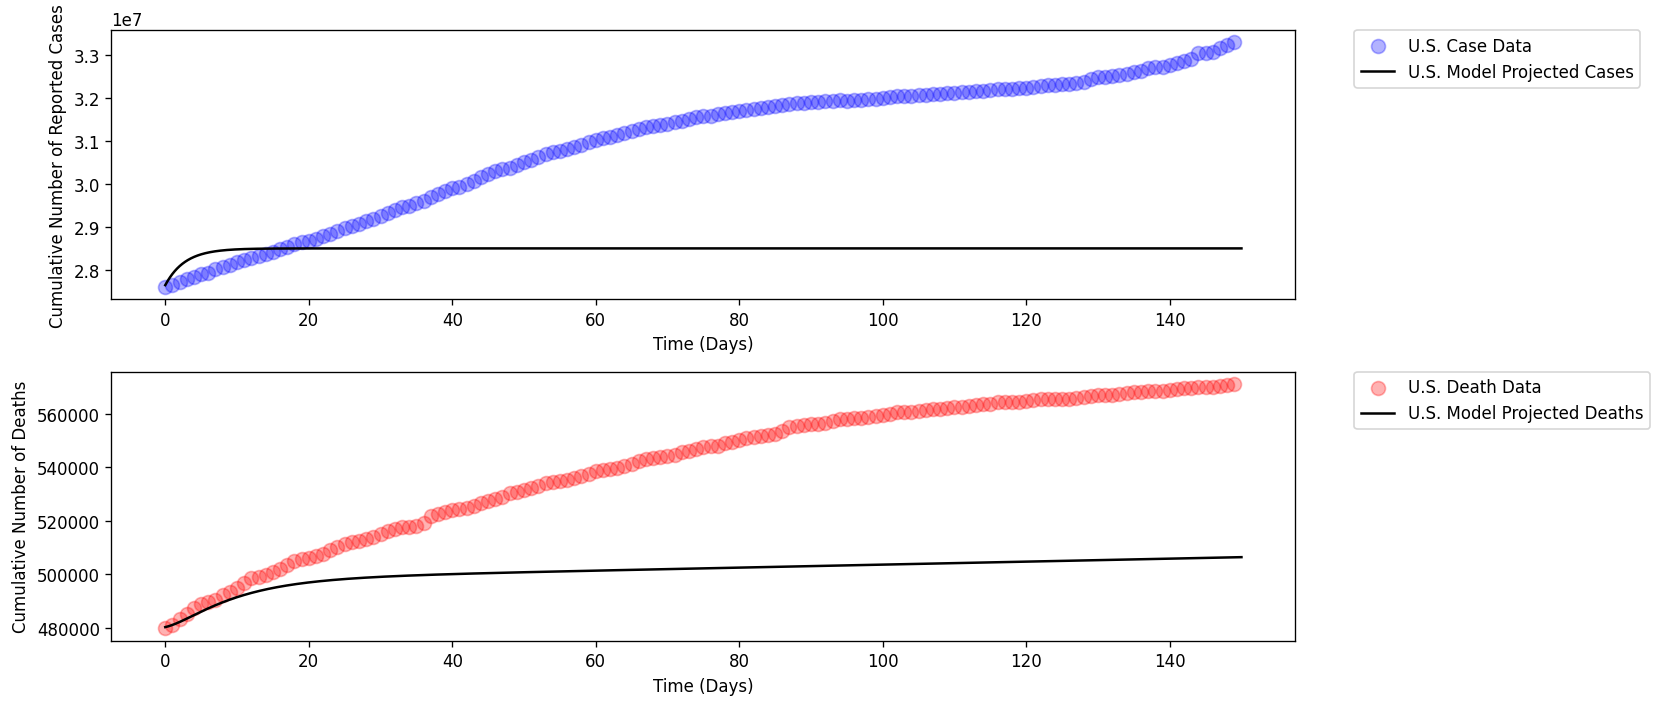

In [109]:
plot_results(T, case_data, death_data, t, x_model_adj)

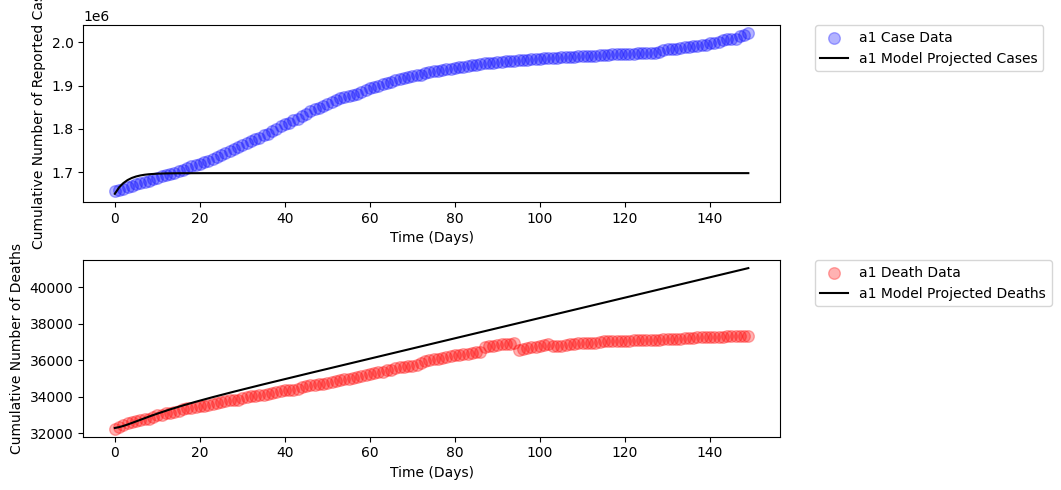

In [110]:





parameters = P


X = odeint(modelcd, x0, times, args=(new_params,))




#Plot...
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,0], c='blue', s = 70, alpha=.3, label = "a1 Case Data")
ax1[0].plot(T, X[:,7], c='black', label = "a1 Model Projected Cases")
ax1[1].scatter(T, death_data[:,0], c='red', s = 70, alpha=.3, label = "a1 Death Data")
ax1[1].plot(T, X[:,6], c='black', label = "a1 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

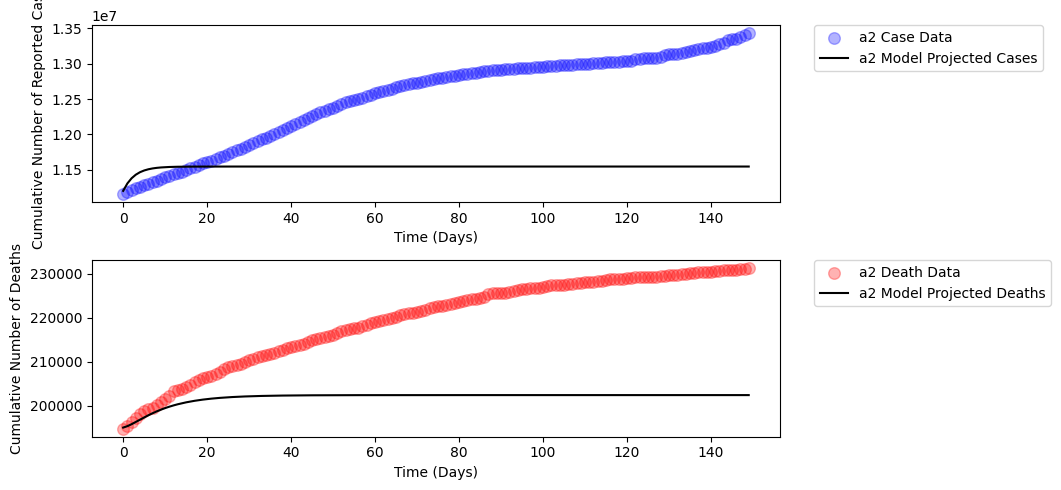

In [111]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,1], c='blue', s = 70, alpha=.3, label = "a2 Case Data")
ax1[0].plot(T, X[:,15], c='black', label = "a2 Model Projected Cases")
ax1[1].scatter(T, death_data[:,1], c='red', s = 70, alpha=.3, label = "a2 Death Data")
ax1[1].plot(T, X[:,14], c='black', label = "a2 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

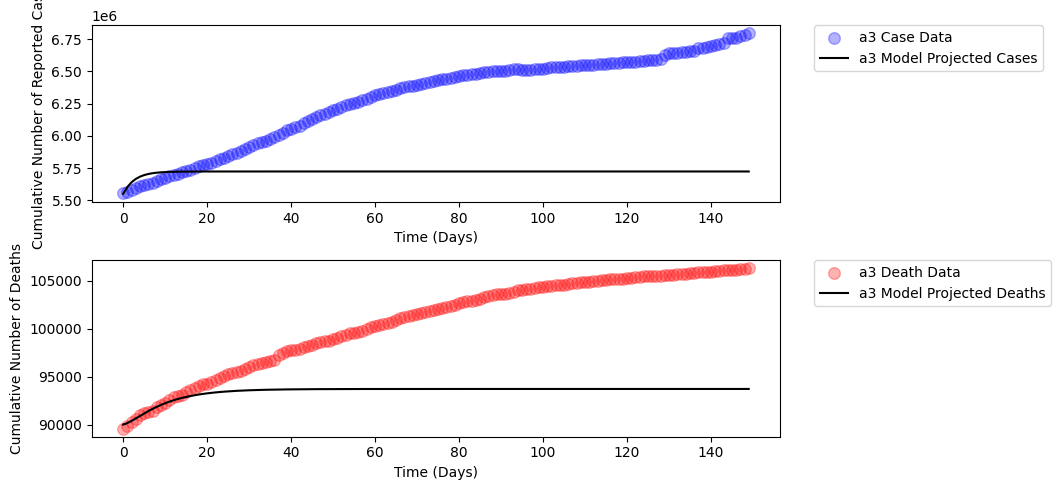

In [112]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,2], c='blue', s = 70, alpha=.3, label = "a3 Case Data")
ax1[0].plot(T, X[:,23], c='black', label = "a3 Model Projected Cases")
ax1[1].scatter(T, death_data[:,2], c='red', s = 70, alpha=.3, label = "a3 Death Data")
ax1[1].plot(T, X[:,22], c='black', label = "a3 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

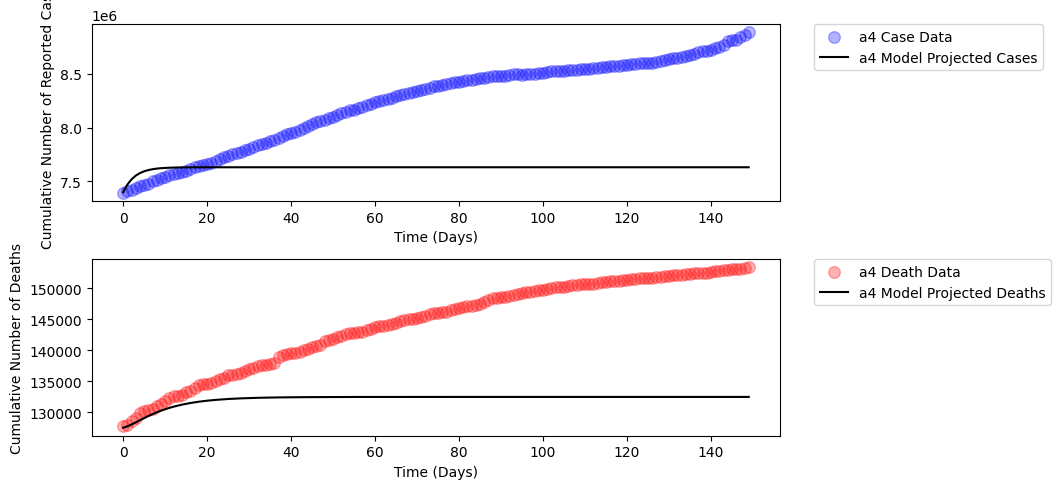

In [113]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,3], c='blue', s = 70, alpha=.3, label = "a4 Case Data")
ax1[0].plot(T, X[:,31], c='black', label = "a4 Model Projected Cases")
ax1[1].scatter(T, death_data[:,3], c='red', s = 70, alpha=.3, label = "a4 Death Data")
ax1[1].plot(T, X[:,30], c='black', label = "a4 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

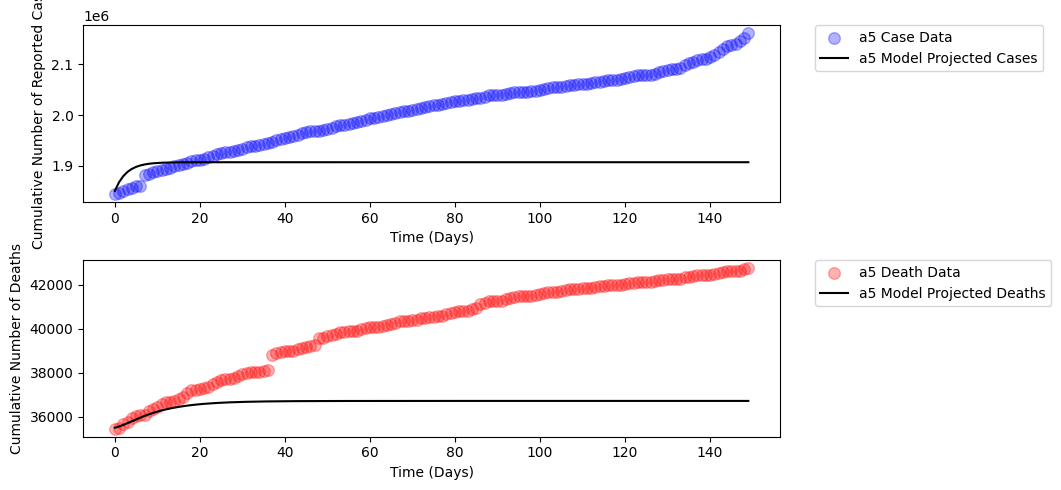

In [114]:
fig, ax1 = plt.subplots(2, 1, figsize=(8,5))


ax1[0].scatter(T, case_data[:,4], c='blue', s = 70, alpha=.3, label = "a5 Case Data")
ax1[0].plot(T, X[:,39], c='black', label = "a5 Model Projected Cases")
ax1[1].scatter(T, death_data[:,4], c='red', s = 70, alpha=.3, label = "a5 Death Data")
ax1[1].plot(T, X[:,38], c='black', label = "a5 Model Projected Deaths")

ax1[0].set_xlabel('Time (Days)')
ax1[1].set_xlabel('Time (Days)')
ax1[0].set_ylabel('Cumulative Number of Reported Cases')
ax1[1].set_ylabel('Cumulative Number of Deaths')

fig.tight_layout()
ax1[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax1[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [115]:
resc, resd = run_nlsfit(x0, parameters, T, X)

TypeError: modelcd() takes 3 positional arguments but 27 were given

In [ ]:
fig1, ax2 = plt.subplots(2, 1, figsize=(8,5))

ax2[0].stem(T, resc, basefmt = '--', markerfmt = 'ko', linefmt = 'k-', label='Residuals')
ax2[0].legend()
ax2[0].set_title('Cases Residuals');

ax2[1].stem(T, resd, basefmt = '--', markerfmt = 'ko', linefmt = 'k-', label='Residuals')
ax2[1].legend()
ax2[1].set_title('Deaths Residuals');

In [ ]:
#R0


rho1 = rho_val[indexd1]
rho2 = rho_val[indexd2]
rho3 = rho_val[indexd3]
rho4 = rho_val[indexd4]
rho5 = rho_val[indexd5]


#a1 R0

deltai1 = rho1/N1
deltaa1 = deltai1*.8
deltavi1 = deltai1*(1-alpha)
deltava1 = deltaa1*(1-alpha)

denS = mu + b1*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro1 = -beta*theta1*(b1*nu*(deltavi1*(lambdaa+mu)*(sigma-1)-deltava1*(lambdai+mu+mu_c)*sigma)+deltai1*(lambdaa+mu)*(sigma-1)*(mu+phi)-deltaa1*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


#a2 R0

deltai2 = rho2/N2
deltaa2 = deltai2*.8
deltavi2 = deltai2*(1-alpha)
deltava2 = deltaa2*(1-alpha)

denS = mu + b2*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro2 = -beta*theta2*(b2*nu*(deltavi2*(lambdaa+mu)*(sigma-1)-deltava2*(lambdai+mu+mu_c)*sigma)+deltai2*(lambdaa+mu)*(sigma-1)*(mu+phi)-deltaa2*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


#a3 R0

deltai3 = rho3/N3
deltaa3 = deltai3*.8
deltavi3 = deltai3*(1-alpha)
deltava3 = deltaa3*(1-alpha)

denS = mu + b3*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro3 = -beta*theta3*(b3*nu*(deltavi3*(lambdaa+mu)*(sigma-1)-deltava3*(lambdai+mu+mu_c)*sigma)+deltai3*(lambdaa+mu)*(sigma-1)*(mu+phi)-deltaa3*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)

#a4 R0

deltai4 = rho4/N4
deltaa4 = deltai4*.8
deltavi4 = deltai4*(1-alpha)
deltava4 = deltaa4*(1-alpha)

denS = mu + b4*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro4 = -beta*theta4*(b4*nu*(deltavi4*(lambdaa+mu)*(sigma-1)-deltava4*(lambdai+mu+mu_c)*sigma)+deltai4*(lambdaa+mu)*(sigma-1)*(mu+phi)-deltaa4*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)

#a5 R0

deltai5 = rho5/N5
deltaa5 = deltai5*.8
deltavi5 = deltai5*(1-alpha)
deltava5 = deltaa5*(1-alpha)

denS = mu + b5*nu
denE = beta + mu
denI = lambdai + mu + mu_c
denA = lambdaa + mu
denV = mu + phi

Ro5 = -beta*theta5*(b5*nu*(deltavi5*(lambdaa+mu)*(sigma-1)-deltava5*(lambdai+mu+mu_c)*sigma)+deltai5*(lambdaa+mu)*(sigma-1)*(mu+phi)-deltaa5*(lambdai+mu+mu_c)*sigma*(mu+phi))/(denS*denE*denI*denA*denV)


print("Ro1 = ",Ro1)
print("Ro2 = ",Ro2)
print("Ro3 = ",Ro3)
print("Ro4 = ",Ro4)
print("Ro5 = ",Ro5)
